# Section 1: Dataset Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("Popular_Baby_Names.csv")

In [3]:
# Display the first 10 rows
print(data.head(10))

   Year of Birth  Gender Ethnicity Child's First Name  Count  Rank
0           2011  FEMALE  HISPANIC          GERALDINE     13    75
1           2011  FEMALE  HISPANIC                GIA     21    67
2           2011  FEMALE  HISPANIC             GIANNA     49    42
3           2011  FEMALE  HISPANIC            GISELLE     38    51
4           2011  FEMALE  HISPANIC              GRACE     36    53
5           2011  FEMALE  HISPANIC          GUADALUPE     26    62
6           2011  FEMALE  HISPANIC             HAILEY    126     8
7           2011  FEMALE  HISPANIC              HALEY     14    74
8           2011  FEMALE  HISPANIC             HANNAH     17    71
9           2011  FEMALE  HISPANIC             HAYLEE     17    71


In [4]:
# Display the shape of the dataset
print(data.shape)

(49509, 6)


In [5]:
# Identify the data types of each column and check for any missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49509 entries, 0 to 49508
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       49509 non-null  int64 
 1   Gender              49509 non-null  object
 2   Ethnicity           49509 non-null  object
 3   Child's First Name  49509 non-null  object
 4   Count               49509 non-null  int64 
 5   Rank                49509 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
None
Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64


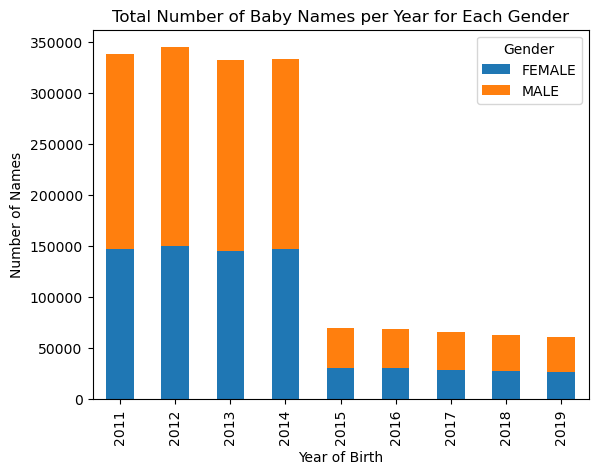

In [6]:
# Create a bar chart that shows the total number of baby names per year for each gender
year_gender_counts = data.groupby(['Year of Birth', 'Gender'])['Count'].sum().unstack()
year_gender_counts.plot(kind='bar', stacked=True)
plt.title('Total Number of Baby Names per Year for Each Gender')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Names')
plt.legend(title='Gender')
plt.show()

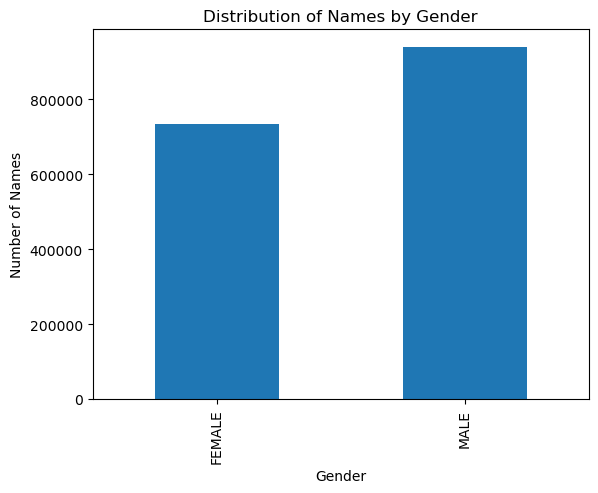

In [7]:
# Create a bar chart that shows the distribution of names (total number) by gender
gender_counts = data.groupby('Gender')['Count'].sum()
gender_counts.plot(kind='bar')
plt.title('Distribution of Names by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Names')
plt.show()

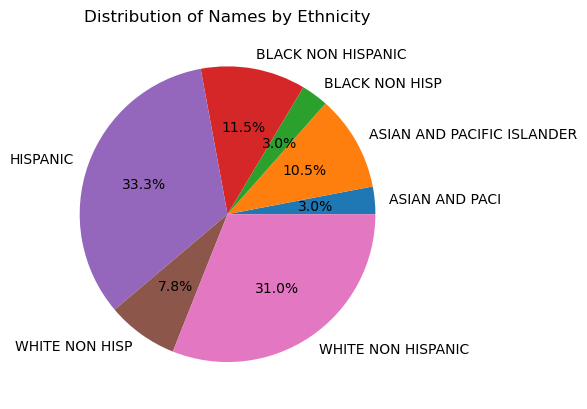

In [8]:
# Create a pie chart that shows the distribution of names (total number in percent) by ethnicity
ethnicity_counts = data.groupby('Ethnicity')['Count'].sum()
ethnicity_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Names by Ethnicity')
plt.ylabel('')
plt.show()

# Section 2: Data Cleaning and Preparation

In [9]:
# Check for duplicated rows in the dataset for the year 2011
duplicates_2011 = data[data['Year of Birth'] == 2011].duplicated()
print(f"Number of duplicated rows in 2011: {duplicates_2011.sum()}")


Number of duplicated rows in 2011: 7826


In [10]:
# Rename columns
data.rename(columns={'Year of Birth': 'Year_of_Birth', "Child's First Name": 'Childs_First_Name'}, inplace=True)


In [11]:
# Create a new column 'Name_Length' for the length of each name excluding non-alphabetic characters
data['Name_Length'] = data['Childs_First_Name'].str.replace(r'[^A-Za-z]', '', regex=True).str.len()


In [12]:
# Create a new column 'Percentage' for the percentage of babies with each name
total_counts_year_gender = data.groupby(['Year_of_Birth', 'Gender'])['Count'].transform('sum')
data['Percentage'] = (data['Count'] / total_counts_year_gender) * 100

In [13]:
# Replace 'Black or African American Non-Hispanic' with 'Black Non-Hispanic'
data['Ethnicity'] = data['Ethnicity'].replace('Black or African American Non-Hispanic', 'Black Non-Hispanic')


In [14]:
# Display the first 10 rows of updated dataset
print(data.head(10))

   Year_of_Birth  Gender Ethnicity Childs_First_Name  Count  Rank  \
0           2011  FEMALE  HISPANIC         GERALDINE     13    75   
1           2011  FEMALE  HISPANIC               GIA     21    67   
2           2011  FEMALE  HISPANIC            GIANNA     49    42   
3           2011  FEMALE  HISPANIC           GISELLE     38    51   
4           2011  FEMALE  HISPANIC             GRACE     36    53   
5           2011  FEMALE  HISPANIC         GUADALUPE     26    62   
6           2011  FEMALE  HISPANIC            HAILEY    126     8   
7           2011  FEMALE  HISPANIC             HALEY     14    74   
8           2011  FEMALE  HISPANIC            HANNAH     17    71   
9           2011  FEMALE  HISPANIC            HAYLEE     17    71   

   Name_Length  Percentage  
0            9    0.008832  
1            3    0.014268  
2            6    0.033291  
3            7    0.025817  
4            5    0.024459  
5            9    0.017665  
6            6    0.085605  
7       

# Section 3: Data Analysis and Visualization

In [15]:
# 1. How many children were named Jacob in 2018 and what is the ethnicity distribution of those children?
jacob_2018 = data[(data['Year_of_Birth'] == 2018) & (data['Childs_First_Name'] == 'Jacob')]
jacob_2018_count = jacob_2018['Count'].sum()
jacob_2018_ethnicity_distribution = jacob_2018.groupby('Ethnicity')['Count'].sum()
print(f"Number of children named Jacob in 2018: {jacob_2018_count}")
print("Ethnicity distribution of children named Jacob in 2018:")
print(jacob_2018_ethnicity_distribution)

Number of children named Jacob in 2018: 540
Ethnicity distribution of children named Jacob in 2018:
Ethnicity
ASIAN AND PACIFIC ISLANDER     46
BLACK NON HISPANIC             36
HISPANIC                      241
WHITE NON HISPANIC            217
Name: Count, dtype: int64


/Users/williepearson/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/williepearson/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


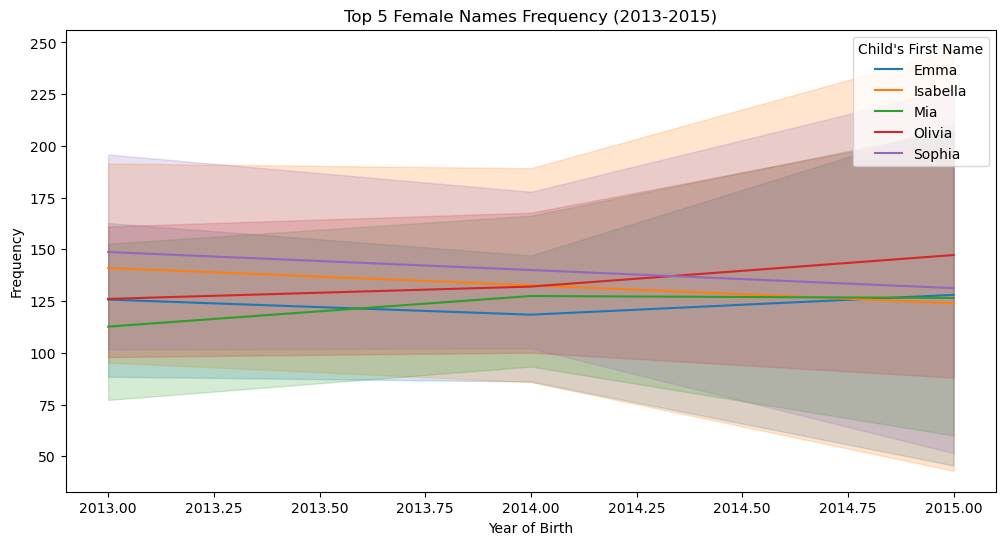

In [16]:
# 2. Create a line plot that shows the frequency of the top 5 names for the female gender between 2013 and 2015.
female_data = data[(data['Gender'] == 'FEMALE') & (data['Year_of_Birth'].between(2013, 2015))]
top_5_female_names = female_data.groupby('Childs_First_Name')['Count'].sum().nlargest(5).index
top_5_female_data = female_data[female_data['Childs_First_Name'].isin(top_5_female_names)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_female_data, x='Year_of_Birth', y='Count', hue='Childs_First_Name')
plt.title('Top 5 Female Names Frequency (2013-2015)')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.legend(title="Child's First Name")
plt.show()

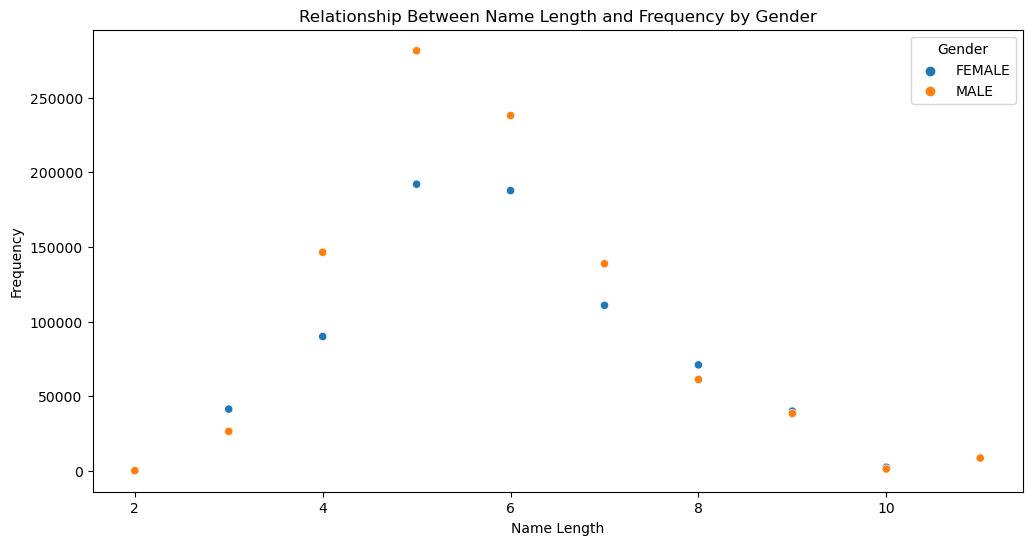

In [17]:
# 3. Relationship between the length of names and their frequency, differentiated by gender
name_length_frequency = data.groupby(['Gender', 'Name_Length'])['Count'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=name_length_frequency, x='Name_Length', y='Count', hue='Gender')
plt.title('Relationship Between Name Length and Frequency by Gender')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.show()

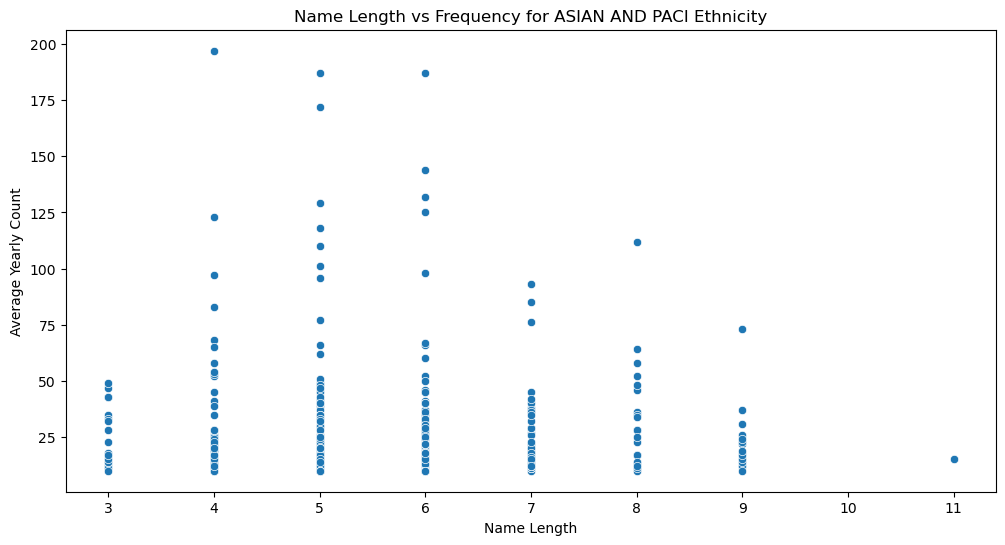

In [18]:
# 4. Scatter plot showing the correlation between name length and frequency for the 'ASIAN AND PACI' ethnicity
asian_paci_data = data[data['Ethnicity'] == 'ASIAN AND PACI']
asian_paci_data_avg = asian_paci_data.groupby(['Childs_First_Name', 'Name_Length'])['Count'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=asian_paci_data_avg, x='Name_Length', y='Count')
plt.title('Name Length vs Frequency for ASIAN AND PACI Ethnicity')
plt.xlabel('Name Length')
plt.ylabel('Average Yearly Count')
plt.show()